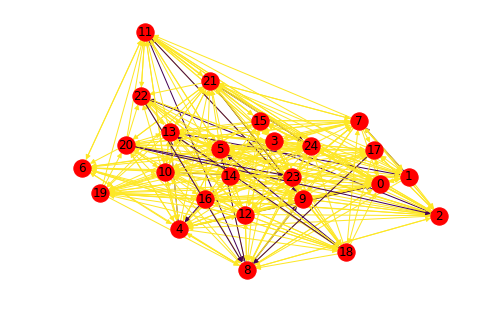

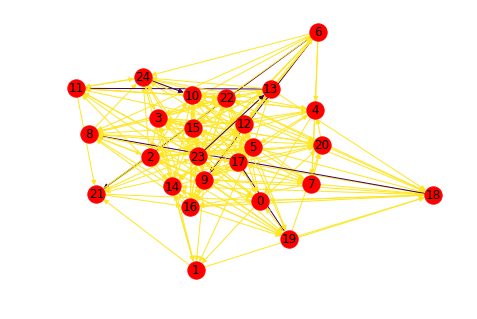

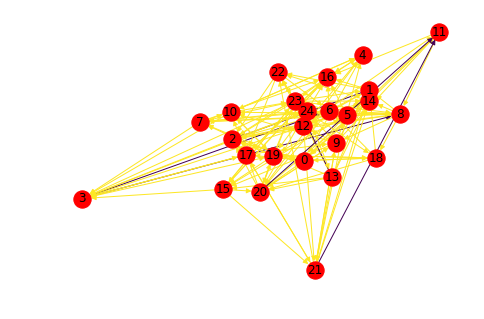

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def a_gr(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        random_weight = np.random.poisson(lam = 3)
        negative_helper = np.random.rand()
        if negative_helper>=0.95:
            random_weight = random_weight*(-1)
            edge_colors.append(4)
        else:
            edge_colors.append(7)
        gr1.edges[u,v]['weight'] = random_weight
    
    adj = nx.adjacency_matrix(gr1)
    nx.draw(gr1, with_labels = True, edge_color = edge_colors)
    plt.show()
    

    
a_gr(0.5,25)
a_gr(0.33,25)
a_gr(0.25,25)

# below - modified the same code so that adj. matrices are returned after a function call
def adj(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        random_weight = np.random.poisson(lam = 3)
        negative_helper = np.random.rand()
        if negative_helper>=0.95:
            random_weight = random_weight*(-1)
            edge_colors.append(4)
        else:
            edge_colors.append(7)
        gr1.edges[u,v]['weight'] = random_weight
    
    adj = nx.adjacency_matrix(gr1)
    return adj

7A.2 - We obtain the (non) existence of an n-step path from node m to u by looking at mu entry of the n-th power of the adjacency matrix

I define a couple of these matrices from m = .5 to .001

[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[242, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[528, 478, 415, 353, 320, 305, 299, 292, 291, 291, 291, 290, 289, 289, 289, 289, 289, 289, 289, 289, 289]
[575, 559, 543, 525, 501, 479, 458, 440, 421, 407, 396, 393, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[624, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625, 625]


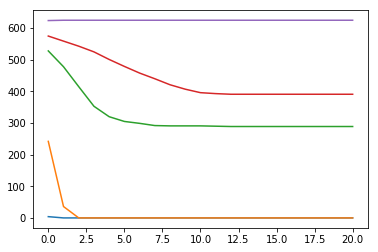

In [19]:
import seaborn as sns


def disconnectedness(adj_matrix, max_path):
    not_connected = []
    ite = 0
    prev_matrix = adj_matrix
    while ite<= max_path:
        adj_now = np.dot(adj_matrix, prev_matrix)
        prev_matrix = adj_now
        rows = adj_now.shape[0]
        cols = adj_now.shape[1]
            
        non_ct = 0
        for x in range(0, rows):
            for y in range(0, cols):
                if adj_now[x,y] ==0:
                    non_ct+=1
        not_connected.append(non_ct)
        ite+=1
    print(not_connected)
    sns.lineplot(data = np.asarray(not_connected))
    

a2 = adj(0.5,25)
a5 = adj(0.2,25)
a3 = adj(0.1,25)
a30 = adj(0.05,25)
a1000 = adj(0.001,25)
adj_m = [a2, a5, a3, a30, a1000]

for mat in adj_m:
    disconnectedness(mat,20)
        
        
    

While low m (close to 2) networks seem to have the property that extending the path can connect any two agents (almost everybody can be connected within 4), high m networks seem to 'stabilize', with close to no improvements in connectivity with increasing n, as can be seen above. Vector entries correspond to number of DISCONNECTED agents.

In [57]:
def disconnectedness(adj_matrix, max_path):
    not_connected = []
    ite = 0
    prev_matrix = adj_matrix
    while ite<= max_path:
        adj_now = np.dot(adj_matrix, prev_matrix)
        prev_matrix = adj_now
        rows = adj_now.shape[0]
        cols = adj_now.shape[1]
            
        non_ct = 0
        for x in range(0, rows):
            for y in range(0, cols):
                if adj_now[x,y] ==0:
                    non_ct+=1
        not_connected.append(non_ct)
        ite+=1
    return not_connected[max_path-1]
    

a2 = adj(1/14,40)
a5 = adj(1/14,40)
a3 = adj(1/16,50)
a30 = adj(1/16,50)
adj_m = [a2, a5, a3, a30]

a2list = []
a5list = []
a3list = []
a30list = []

ct = 0
while ct <= 50:
    a2 = adj(1/14,40)
    a5 = adj(1/14,40)
    a3 = adj(1/16,50)
    a30 = adj(1/16,50)
    a = disconnectedness(a2,5)
    b = disconnectedness(a5,5)
    c = disconnectedness(a3,5)
    d = disconnectedness(a30,5)
    
    a2list.append(a)
    a5list.append(b)
    a3list.append(c)
    a30list.append(d)
    ct+=1

In [130]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def missing_distr(values):

    def func(x, a, b, c):
         return c * x ** a * np.exp(-b * x)
    xdata = np.linspace(0,600,51)
    ydata = np.asarray(values)

    popt, pcov = curve_fit(func, xdata, ydata)
    print(popt)
    sns.distplot(np.asarray(values))

C:\Users\Jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  
C:\Users\Jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
C:\Users\Jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


[2.33128467e-01 1.74135537e-03 1.49638960e+02]
[2.30652119e-06 2.82246411e-04 3.83544281e+02]
[1.36688306 0.92408463 2.05726157]
[2.16321101e-01 1.17411046e-03 1.55396526e+02]


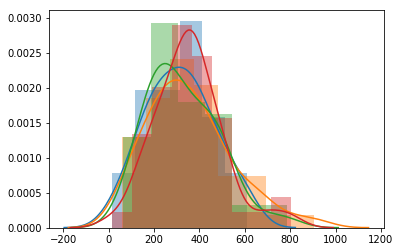

In [131]:
lists = [a2list, a3list, a5list, a30list]
for elem in lists:
    missing_distr(elem)

The above are the dirsributions, with pamaters a, b, c respectively.They are centered around the mean(expected) missing connections number. I chose 5 steps, which I thought provided the most diverse (from the vectors printed out above) results. We see that, as expected, this roughly matches the distribution from which the probability of linbk creation was drawn, i.e poisson with lambda=3. I plot it below for comparison

C:\Users\Jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


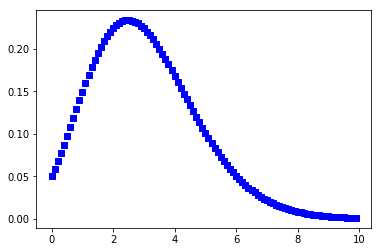

In [133]:
from scipy.misc import factorial

t = np.arange(0, 10, 0.1)
d = np.exp(-3)*np.power(3, t)/factorial(t)

plt.plot(t, d, 'bs')
plt.show()